In [1]:
# 作業：在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
import pingouin as pg
import researchpy
%matplotlib inline
import warnings
warnings.filterwarnings( 'ignore' )

# 顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
data = pd.read_csv("Titanic_train.csv")
# 計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print('遺失資料比例:\n',missing_vals)
# Age、Cabin & Embarked 有遺失值

遺失資料比例:
              missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


Age 與 Survied 相關性：


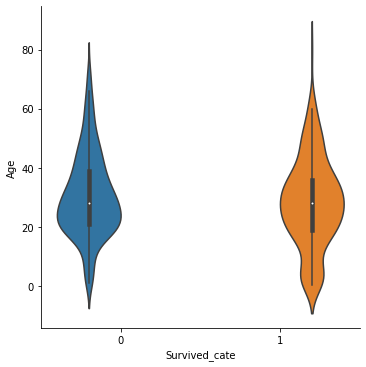

組間與組內變異數：
組間變異數 =  897.1875816713222
組內變異數 =  149559.44836244633
總變異數 =  150456.63594411765
Eta Squared (η2) =  0.0059630974469252
judgment_etaSq = Negligible

***************************************************

Q1答案：透過數值法計算 Sex 和 Survived 無相關性。


In [2]:
# Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
# 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
data['Survived_cate'] = data['Survived'].astype('object')
data['Survived_cate'].head(5)
g = sns.catplot( x='Survived_cate', y='Age', hue='Survived_cate', data=data, kind='violin' )
print('Age 與 Survied 相關性：')
plt.show()

aov = pg.anova(dv='Age', between='Survived_cate', data=data, detailed=True )
print('組間與組內變異數：')
aov
print('組間變異數 = ', aov.SS[0])
print('組內變異數 = ', aov.SS[1])
print('總變異數 = ', aov.SS[0]+aov.SS[1])
# 算相關性 Eta Squared (η2)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print('Eta Squared (η2) = ', etaSq)

# 判斷相關的準則
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

print('judgment_etaSq =', judgment_etaSq(etaSq))
print('\n***************************************************')
print('\nQ1答案：透過數值法計算 Sex 和 Survived 無相關性。')

In [3]:
# Q2: 透過數值法計算 Sex 和 Survived 是否有相關性?
# g = sns.countplot( x='Sex', hue='Survived_cate', data=data)
# 用交叉列連表(contingency table)
contTable = pd.crosstab( data['Sex'], data['Survived_cate'] )
contTable

# 計算自由度 df
df = min(contTable.shape[0], contTable.shape[1]) - 1
print('自由度 df =', df)
print('\n**************************************')
crosstab, res = researchpy.crosstab(data['Sex'], data['Survived_cate'], test='chi-square')
print(crosstab)
print('\n**************************************')
print(res)
print("\nCramer's V =",res.loc[2,'results'])

# 寫一個 function 判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

print('judgment_CramerV = ', judgment_CramerV(df,res.loc[2,'results']))
print('\n***************************************************')
print('\nQ2答案：透過數值法計算 Sex 和 Survived 相關性高。')

自由度 df = 1

**************************************
              Survived_cate          
Survived_cate             0    1  All
Sex                                  
female                   81  233  314
male                    468  109  577
All                     549  342  891

**************************************
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434

Cramer's V = 0.5434
judgment_CramerV =  large

***************************************************

Q2答案：透過數值法計算 Sex 和 Survived 相關性高。


Pearson 相關係數 = 0.09606669176903906
Q3答案：透過數值法計算 Age 和 Fare 的 Pearson 相關係數 < 0.1，判定為無線性相關。


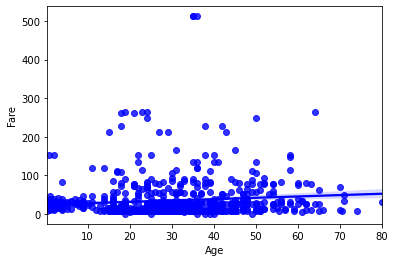

In [4]:
# Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
# 透過最上面查詢 Age 遺失資料比例約20%，先處理遺失值
data_age = data.dropna(subset=['Age'])
g = sns.regplot(x="Age", y="Fare", color="b",data=data_age)

corr, p_value =stats.pearsonr(data_age['Age'], data_age['Fare'])
print('Pearson 相關係數 =', corr)
print('Q3答案：透過數值法計算 Age 和 Fare 的 Pearson 相關係數 < 0.1，判定為無線性相關。')